In [1]:
!pip install CFEDemands==0.1.6.3

In [2]:
import pandas as pd
import numpy as np
import cfe
import random

%matplotlib inline
import cfe    
import pandas as pd
import pylab as pl

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

In [3]:
def getZ(file):
    z_ank = file[['id', 'age', 'sex', 'fam_size']]
    z_ank

    s1 = ['Male', 'Female', np.nan]
    pd.get_dummies(s1)
    z_ank['M'] = ""
    z_ank['F'] = ""
    z_ank['log_fsize'] = np.log(z_ank['fam_size'])
    z_ank['j'] = z_ank['id']
    z_ank['t'] = 17
    z_ank['m'] = 'A'

    z_ank.loc[z_ank['sex'] == 'Male', 'M'] = 1
    z_ank.loc[z_ank['M'] == '', 'M'] = 0
    z_ank.loc[z_ank['sex'] == 'Female', 'F'] = 1
    z_ank.loc[z_ank['F'] == '', 'F'] = 0


    z_ank.drop(columns = ['sex', 'fam_size', 'id'], inplace = True)
    z_ank.set_index(['j','t','m'],inplace=True)
    return z_ank

In [4]:
def getXandY(file, x_vars):
    x_file = file[x_vars]
    x_file['id'] = file['id']
    x_file['net_income'] = file['net_income']
    x_file['j'] = x_file['id']
    x_file['t'] = 17
    x_file['m'] = 'A'

    for col in x_vars:
        x_file[(col[:len(col) - 8])] = (x_file[col] * x_file['net_income']) + np.random.rand()

    x_file.drop(columns = x_vars, inplace = True)
    x_file.drop(columns = ['id', 'net_income'], inplace = True)
    x_file.set_index(['j','t','m'],inplace=True)

    y_file = np.log(x_file.replace(0,np.nan))
    return [x_file, y_file]

In [5]:
def getResults(Y, Z):
    result_file = cfe.Result(y=Y,z=Z)
    result_file.get_reduced_form()
    result_file.delta.to_dataframe().unstack('k')
    result_file.a.to_dataframe().unstack('i')
    return result_file

In [6]:
def finalPlot(x_ank, z_ank, result_ank, color):
    result_ank.get_predicted_log_expenditures()

    x_ank = result_ank.y.sum('i').to_dataframe().squeeze()
    xhat_ank = result_ank.yhat.sum('i').to_dataframe().squeeze()

    %matplotlib inline
    import cfe
    import pandas as pd
    import pylab as pl

    r0 = result_ank

    # Turn off variation in household composition
    r0['z'] = r0['z']*0

    # select years and markets you want
    l0 = r0.loglambdas.sel(t=17,m='A')

    # Predicted total expenditures given lambda & prices
    x0 = r0.get_predicted_expenditures().sum('i').sel(t=17,m='A')

    pl.scatter(x0,l0, c = color, alpha = 0.3)
    pl.show()

In [7]:
def runitup(file, xvars, color):
    Z = getZ(file)
    tmp = getXandY(file, xvars)
    X = tmp[0]
    Y = tmp[1]
    result = getResults(Y, Z)
    finalPlot(X, Z, result, color)
    return result

In [8]:
ank = pd.read_csv("Anchorage__data.csv")
sf = pd.read_csv("sf.csv")
hi = pd.read_csv("hi.csv")

In [9]:
ank.columns

Index(['Unnamed: 0', 'id', 'age', 'highest_education', 'profession',
       'hispanic', 'weekly_hours_worked', 'in_college', 'is_married',
       'schoolmeals_purchases', 'self_employed', 'sex', 'supp_security',
       'reason_unemployment', 'main_profession', 'numweeks_schoolmeals',
       'id_2', 'psu', 'psu_popsize', 'net_income', 'total_food_percent',
       'rent_income_percent', 'alcbev_percent', 'bakery_percent',
       'beef_percent', 'cereal_percent', 'child_age', 'housing_type',
       'census_division', 'eggs_percent', 'fam_size', 'food_away_percent',
       'food_home_percent', 'fresh_fruit_percent', 'fresh_veg_percent',
       'value_foodstamps', 'number_foodstamps', 'non_alc_grocery_percent',
       'milk_percent', 'number_earners', 'non_alc_bevs_percent',
       'oils_percent', 'othdairy_percent', 'othmeat_percent',
       'members_under18', 'members_over64', 'pet_food_percent', 'pork_percent',
       'procfruit_percent', 'proc_veg_percent', 'spouse_race',
       'seafoo

In [10]:
x_vars = [ 'bakery_percent',
           'beef_percent', 'cereal_percent', 
        'eggs_percent', 'fresh_fruit_percent', 
          'fresh_veg_percent', 
          'othmeat_percent', 'milk_percent', 'oils_percent',
         'othdairy_percent', 'procfruit_percent', 'proc_veg_percent',
         'seafood_percent', 'sweets_percent']

x_friv = ['smoking_percent', 'sweets_percent']

In [11]:
ank_result = runitup(ank, x_vars, 'red')

LinAlgError: Singular matrix

In [13]:
sf_result =runitup(sf, x_vars, 'blue')

LinAlgError: Singular matrix

In [94]:
ank_result.get_beta().to_dataframe()

,beta
i,
bakery,1.238299
beef,1.663004
cereal,1.654606
eggs,1.494203
fresh_fruit,1.338683
fresh_veg,1.255689
milk,0.594338
oils,0.988084
othdairy,1.050850


In [95]:
sf_result.get_beta().to_dataframe()

,beta
i,
bakery,1.448000
beef,1.722038
cereal,1.706676
eggs,2.001437
fresh_fruit,2.565552
fresh_veg,1.707687
milk,0.633915
oils,3.263811
othdairy,1.187102


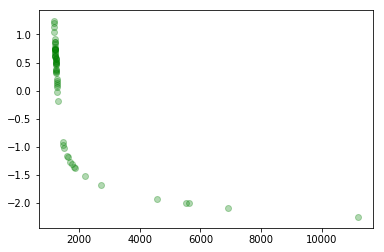

In [150]:
ank_result_friv = runitup(ank, x_friv, 'green')

In [151]:
ank_result_friv.get_beta().to_dataframe()

,beta
i,
smoking,3.503797
sweets,0.073371


In [22]:
sf_result_friv = runitup(ank, x_friv, 'orange')

LinAlgError: Singular matrix

In [149]:
sf_result_friv.get_beta().to_dataframe()

,beta
i,
smoking,0.200236
sweets,3.099267


In [159]:
sf.head()

,id,age,highest_education,profession,hispanic,weekly_hours_worked,in_college,is_married,schoolmeals_purchases,self_employed,...,pork_percent,procfruit_percent,proc_veg_percent,spouse_race,seafood_percent,smoking_percent,lives_in_MSA,state,sweets_percent,vehicle
0,361380,64,High school graduate,Paid employee of a PRIVATE company,Yes,40.0,Not at all,Married,NaN,No,...,0.000000,0.000000,0.000000,4.0,0.000905,0.0,Yes,California,0.000000,1.0
1,361592,44,Master’s or greater,Paid employee of a PRIVATE company,No,27.0,Not at all,Married,NaN,No,...,0.002802,0.000633,0.000423,1.0,0.000000,0.0,Yes,California,0.001374,1.0
2,361654,27,Bachelor’s degree,Paid employee of a PRIVATE company,No,40.0,Not at all,Never married,NaN,No,...,0.003459,0.000000,0.001730,NaN,0.002487,0.0,Yes,California,0.000000,NaN
3,361896,80,Some college but no degree,NaN,No,NaN,Not at all,Married,NaN,No,...,0.001048,0.001854,0.001234,1.0,0.000000,0.0,Yes,California,0.000000,2.0
4,362005,82,High school graduate,NaN,Yes,NaN,Not at all,Married,NaN,No,...,0.003298,0.008355,0.002922,1.0,0.003086,0.0,Yes,California,0.009738,NaN


In [160]:
sf.columns

Index(['id', 'age', 'highest_education', 'profession', 'hispanic',
       'weekly_hours_worked', 'in_college', 'is_married',
       'schoolmeals_purchases', 'self_employed', 'sex', 'supp_security',
       'reason_unemployment', 'main_profession', 'numweeks_schoolmeals',
       'id_2', 'psu', 'psu_popsize', 'net_income', 'total_food_percent',
       'rent_income_percent', 'alcbev_percent', 'bakery_percent',
       'beef_percent', 'cereal_percent', 'child_age', 'housing_type',
       'census_division', 'eggs_percent', 'fam_size', 'food_away_percent',
       'food_home_percent', 'fresh_fruit_percent', 'fresh_veg_percent',
       'value_foodstamps', 'number_foodstamps', 'non_alc_grocery_percent',
       'milk_percent', 'number_earners', 'non_alc_bevs_percent',
       'oils_percent', 'othdairy_percent', 'othmeat_percent',
       'members_under18', 'members_over64', 'pet_food_percent', 'pork_percent',
       'procfruit_percent', 'proc_veg_percent', 'spouse_race',
       'seafood_percent', 's